# Part 2: Segmentation

In this notebook, we will explore different classical (non-machine-learning) methods to partition an image into objects of interest.

In [1]:
import os
import numpy as np
import imageio
import matplotlib.pyplot as plt
import skimage as skm

plt.rcParams['figure.dpi'] = 200

## 1. Data loading

We will work with images from the BBBC datasets considered in notebook 1 - Handling Image Data. For each dataset, we will consider examples of an "easier" segmentation problem. The "harder" samples should be left aside for now and until section 4.

**1.1** Using what you learned in notebook 1 - Handling Image Data, load the following image files:
- data/BBBC010/segmentation_easier.tif
- data/BBBC010/segmentation_harder.tif
- data/BBBC020/segmentation_easier.tif
- data/BBBC020/segmentation_harder.tif

In [2]:
# BBBC010
bbbc010_easy = imageio.imread('data/BBBC010/segmentation_easier.tif')
bbbc010_hard = imageio.imread('data/BBBC010/segmentation_harder.tif')

# BBBC020
bbbc020_easy = imageio.imread('data/BBBC020/segmentation_easier.tif')
bbbc020_hard = imageio.imread('data/BBBC020/segmentation_harder.tif')

**1.2** Using what you learned in notebook 1 - Handling Image Data, vizualize the images you will be working with.

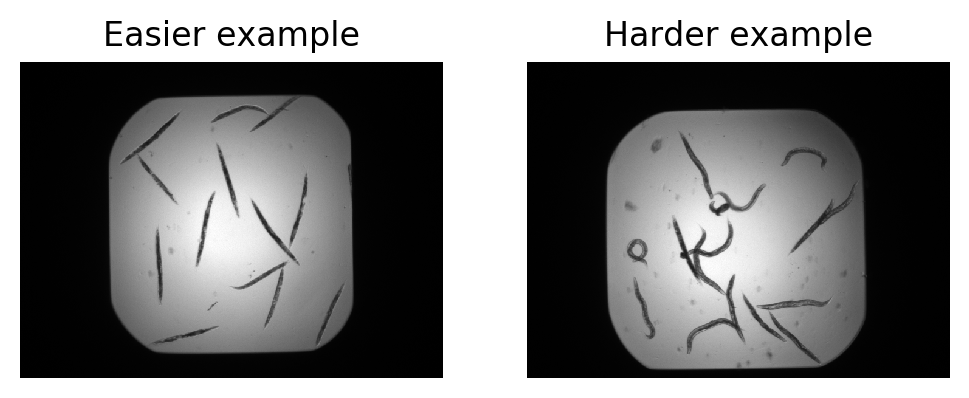

In [3]:
# BBBC010
fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].imshow(bbbc010_easy, cmap='gist_gray')
axes[0].axis('off')
axes[0].set_title('Easier example')

axes[1].imshow(bbbc010_hard, cmap='gist_gray')
axes[1].axis('off')
axes[1].set_title('Harder example')

plt.show()

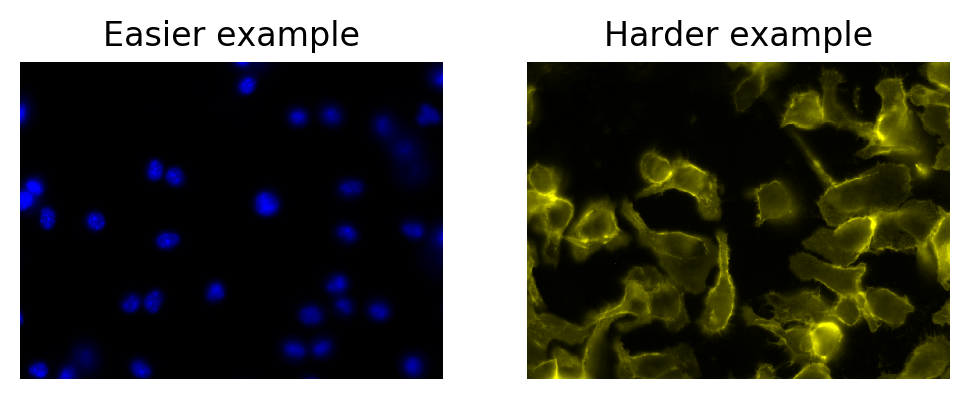

In [4]:
# BBBC020
fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].imshow(bbbc020_easy, cmap='gist_gray')
axes[0].axis('off')
axes[0].set_title('Easier example')

axes[1].imshow(bbbc020_hard, cmap='gist_gray')
axes[1].axis('off')
axes[1].set_title('Harder example')

plt.show()

## 2. Thresholding

As a first step, we will attempt to group pixels into two broad "background" (containing no relevant information) and "foreground" (containing the objects of interest) categories. This is referred to as *semantic segmentation*.

**2.1** The simplest way to segment an image is to identify a cutoff value that separates pixels belonging to the background and foreground. This is referred to as *thresholding*. To help us find a threshold value, observe the  histogram of the BBBC020 image obtained by running the code below.

**2.2** Based on the histogram, choose a threshold value. Then, complete the code below to set all pixels with values smaller than this threshold to 0 and all pixels with values larger than this threshold to 1. The resulting binary image is referred to as a *mask*.

In [ ]:
# Visualize the result

**2.3** The process of finding a threshold value can be automated. Several methods are available to automatically retreive a threshold value, but since they are based on different criteria this value may differ. Run the code below to see the result of a handful of automated thresholding algorithms. Do you see any difference? How does it compare to what you obtained by thresholding manually?

Now that we've identified which parts of the image belong to foreground, we may want to separate it into individual objects. This is referred to as *instance segmentation*.

**2.4** Connected components

**2.5** Finding contours

**2.6** Using your favourite automated thresholding method, try to segment the BBBC010 image. 

*Hint: remember that background can be subtracted by making use of Gaussian filtering, as seen in notebook 1 - Handling Image Data!*

**2.7** Mathematical morphology

## 3. Watershed

Some intuitive explanation of watershed (https://en.wikipedia.org/wiki/Watershed_(image_processing))

**3.1** Compute the gradient

**3.2** Run watershed

## 4. GraphCut

Some intuitive explanation of GraphCut (https://en.wikipedia.org/wiki/Graph_cuts_in_computer_vision)

**4.1**

## 5. Active contours

Some intuitive explanation of active contours

**5.1** Snakes

**5.2** Chan-Vese

## 6. So you think you can segment?

Apply everything you've seen in previous sections to try and segment the hard images. We'll see how well you can do!

**6.1** GT and semantic segmentation metrics (IoU and Dice). Best number wins

**6.2** Your turn! BBBC010

**6.3** Your turn! BBBC020